In [53]:
from spec_id import Likelihood_contours,Median_w_Error,Highest_likelihood_model_JWST,Scale_model
from scipy.interpolate import interp1d
from scipy.ndimage import filters
from matplotlib import gridspec
from astropy.io import ascii
from astropy.table import Table
from glob import glob
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
sea.set(style='white')
sea.set(style='ticks')
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({'xtick.direction': 'in','xtick.top':True,'xtick.minor.visible': True,
               'ytick.direction': "in",'ytick.right': True,'ytick.minor.visible': True})
cmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.2, as_cmap=True)

In [54]:
age = np.arange(0.5,2.1,0.1)
metal = np.arange(0.004,0.028,0.001)
tau = [0, 8.0, 8.48, 8.7, 8.85, 8.95, 9.04, 9.11, 9.18, 9.23, 9.28, 9.32, 9.36, 9.4, 9.43, 9.46]
M,A=np.meshgrid(metal,age)

In [55]:
Z,PZ = np.load('../chidat/prism_z2_Z_pos.npy')
t,Pt = np.load('../chidat/prism_z2_t_pos.npy')

(0.021, 0.0, 0.0)
(0.80000000000000000001, 0.041, 0.045999999999999999999)


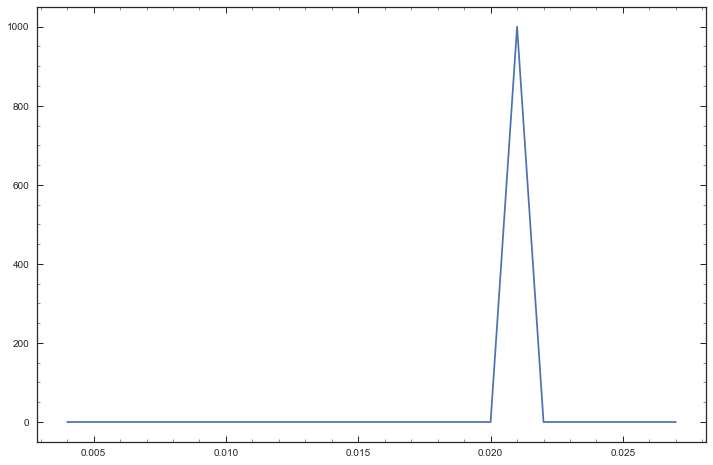

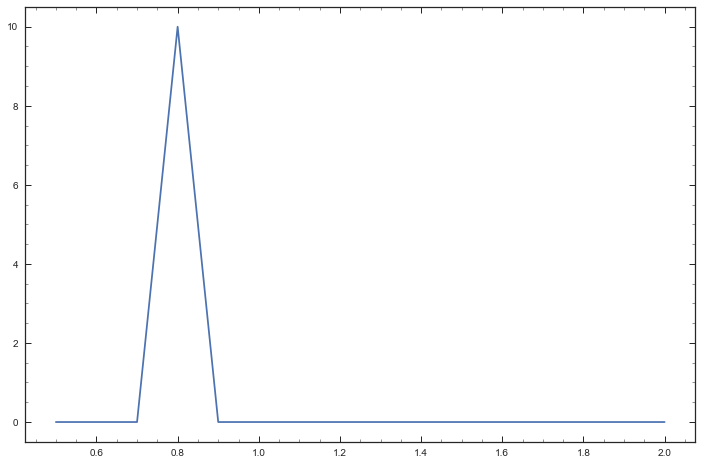

In [56]:
%matplotlib inline

plt.figure(figsize = [12,8])
plt.plot(Z,PZ)

plt.figure(figsize = [12,8])
plt.plot(t,Pt)

print Median_w_Error(PZ,Z)
print Median_w_Error(Pt,t)

In [57]:
###DATA
P = np.load('../chidat/prism_z3_tZ_pos.npy')
Z,PZ = np.load('../chidat/prism_z3_Z_pos.npy')
t,Pt = np.load('../chidat/prism_z3_t_pos.npy')
onesig,twosig = Likelihood_contours(age,metal,P)
levels = np.array([twosig,onesig])

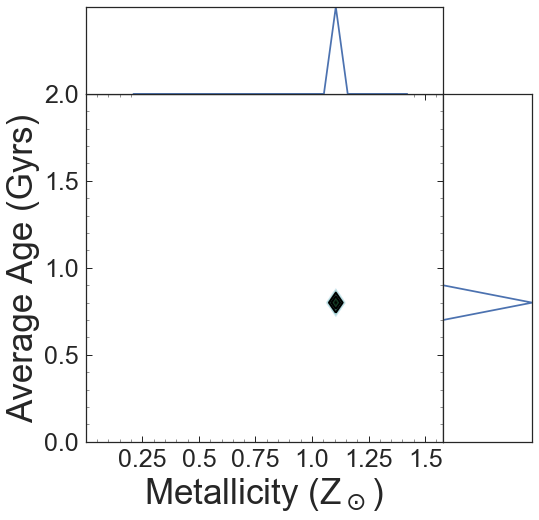

In [58]:
###PLOT
gs = gridspec.GridSpec(2,2,height_ratios=[1,4],width_ratios=[4,1],hspace=0,wspace=0)
plt.figure(figsize=[8,8])

plt.subplot(gs[2])
plt.contour(M,A,P,levels,colors='k',linewidths=2)
plt.contourf(M,A,P,40,cmap=cmap)
plt.axis([0,0.03,0,2])
plt.xlabel('Metallicity (Z$_\odot$)',size=35)
plt.ylabel('Average Age (Gyrs)',size=35)
plt.tick_params(axis='both', which='major', labelsize=25)
plt.xticks([ 0.00475,  0.0095 ,  0.01425,  0.019  ,  0.02375,  0.0285 ],[0.25,.5,0.75,1.0,1.25,1.5])

plt.subplot(gs[0])
plt.plot(Z,PZ)
plt.xticks([])
plt.yticks([])
plt.xlim(0,0.03)
plt.ylim(0,max(PZ))

plt.subplot(gs[3])
plt.plot(Pt,t)
plt.xticks([])
plt.yticks([])
plt.ylim(0,2)
plt.xlim(0,max(Pt))

plt.show()
# plt.savefig('../plots/nirspec_sim_Lh_2.png')
plt.close()

In [58]:
bftau = Highest_likelihood_model_JWST('../data/nirspec_sim_data.npy',3.717,0.02,1.0,tau)

IOError: [Errno 2] No such file or directory: '../JWST/m0.02_a1.0_t0_3.717.npy'

In [ ]:
bftau

(0.02, 1.0, 8.0)

In [ ]:
wv,fl,flx,er = np.load('../data/nirspec_sim_data.npy')
mwv,mfl = np.load('../JWST/m0.02_a1.0_t8.0_nirspec.npy')

In [ ]:
C = Scale_model(flx[wv<4.9],er[wv<4.9],mfl[wv<4.9])

In [ ]:
lowess = sm.nonparametric.lowess

In [ ]:
smwv,smfl=lowess(flx,wv[wv<4.9],frac=1/150.).T

In [ ]:
print np.array([metal/0.019,metal,range(len(metal))]).T

[[  2.10526316e-01   4.00000000e-03   0.00000000e+00]
 [  2.63157895e-01   5.00000000e-03   1.00000000e+00]
 [  3.15789474e-01   6.00000000e-03   2.00000000e+00]
 [  3.68421053e-01   7.00000000e-03   3.00000000e+00]
 [  4.21052632e-01   8.00000000e-03   4.00000000e+00]
 [  4.73684211e-01   9.00000000e-03   5.00000000e+00]
 [  5.26315789e-01   1.00000000e-02   6.00000000e+00]
 [  5.78947368e-01   1.10000000e-02   7.00000000e+00]
 [  6.31578947e-01   1.20000000e-02   8.00000000e+00]
 [  6.84210526e-01   1.30000000e-02   9.00000000e+00]
 [  7.36842105e-01   1.40000000e-02   1.00000000e+01]
 [  7.89473684e-01   1.50000000e-02   1.10000000e+01]
 [  8.42105263e-01   1.60000000e-02   1.20000000e+01]
 [  8.94736842e-01   1.70000000e-02   1.30000000e+01]
 [  9.47368421e-01   1.80000000e-02   1.40000000e+01]
 [  1.00000000e+00   1.90000000e-02   1.50000000e+01]
 [  1.05263158e+00   2.00000000e-02   1.60000000e+01]
 [  1.10526316e+00   2.10000000e-02   1.70000000e+01]
 [  1.15789474e+00   2.20000

In [ ]:
P150 = P.T[23] / np.trapz(P.T[23],age)
P50 = P.T[6] / np.trapz(P.T[6],age)

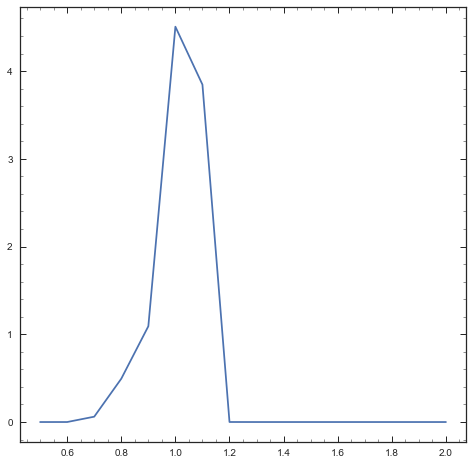

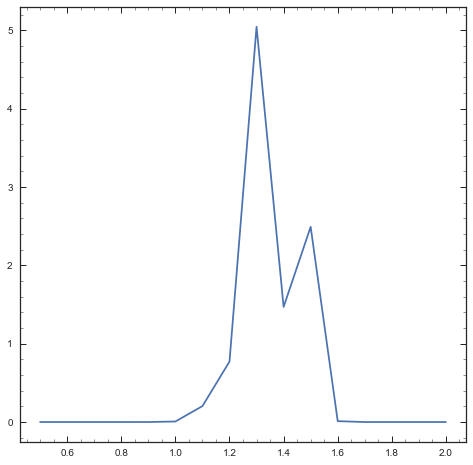

In [ ]:
plt.figure(figsize=[8,8])
plt.plot(age,P150)

plt.figure(figsize=[8,8])
plt.plot(age,P50)

In [ ]:
print Median_w_Error(P50,age)
print Median_w_Error(P150,age)
print Highest_likelihood_model_JWST('../data/nirspec_sim_data.npy',3.717,0.01,1.4,tau)
print Highest_likelihood_model_JWST('../data/nirspec_sim_data.npy',3.717,0.027,1.1,tau)

(1.3999999999999999, 0.14499999999999999, 0.085999999999999993)
(1.1000000000000001, 0.16700000000000001, 0.01)
(0.01, 1.4, 8.0)
(0.027, 1.1, 8.48)


In [ ]:
wv,fl,flx,er = np.load('../data/nirspec_sim_data.npy')
mwv,mfl = np.load('../JWST/m0.02_a1.0_t8.0_nirspec.npy')
mwv,mfl50 = np.load('../JWST/m0.01_a1.4_t8.0_nirspec.npy')
mwv,mfl150 = np.load('../JWST/m0.027_a1.1_t8.48_nirspec.npy')
C = Scale_model(flx[wv<4.9],er[wv<4.9],mfl[wv<4.9])
C50 = Scale_model(flx[wv<4.9],er[wv<4.9],mfl50[wv<4.9])
C150 = Scale_model(flx[wv<4.9],er[wv<4.9],mfl150[wv<4.9])

In [ ]:
smfl = filters.gaussian_filter1d(flx[wv<4.9],sigma=4)

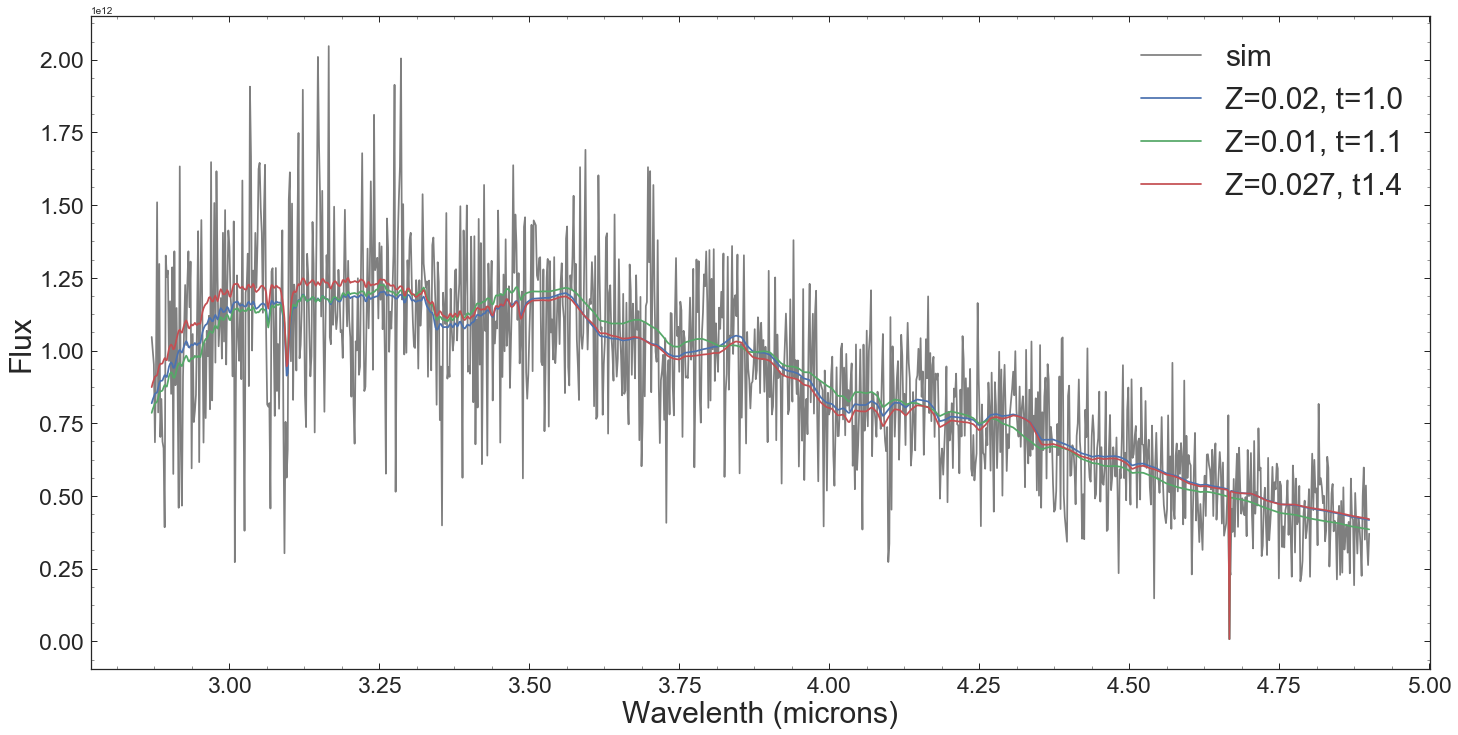

In [ ]:
%matplotlib inline

plt.figure(figsize=[24,12])
plt.plot(wv[wv<4.9],flx[wv<4.9],color='k',alpha = .5,label = 'sim')
# plt.plot(wv[wv<4.9],smfl,color='k',alpha = .5,label = 'sim')
plt.plot(mwv[wv<4.9],mfl[wv<4.9]*C,label='Z=0.02, t=1.0')
plt.plot(mwv[wv<4.9],mfl50[wv<4.9]*C50,label='Z=0.01, t=1.1')
plt.plot(mwv[wv<4.9],mfl150[wv<4.9]*C150,label='Z=0.027, t1.4')
plt.xlabel('Wavelenth (microns)',fontsize=30)
plt.legend(fontsize=30)
plt.ylabel('Flux',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=23)
plt.show()
plt.close()

In [ ]:
def smoothing(fl,h):
    kernal=-np.linspace(-1,1,h+3)**2+1

    sm = np.zeros(len(fl))
    for i in range(len(fl)):
        w = np.zeros(len(fl))
        for ii in range(len(kernal)):
            if ii + i - h + 1 >= 0 and ii + i - h + 1 < len(fl):
                w[ii + i - h + 1] = kernal[ii] 
        sm[i] = sum(fl[w != 0] * w[w != 0]) / sum(w[w != 0])
    return sm

In [ ]:
P.T[6]

array([ 0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,
        0.0,  0.0,  0.0,  0.0,  0.0], dtype=float128)

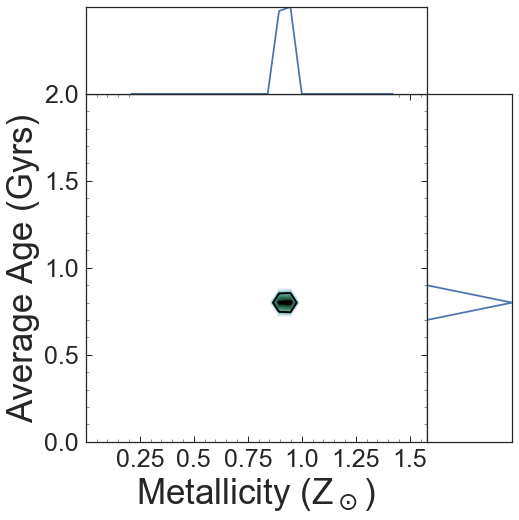

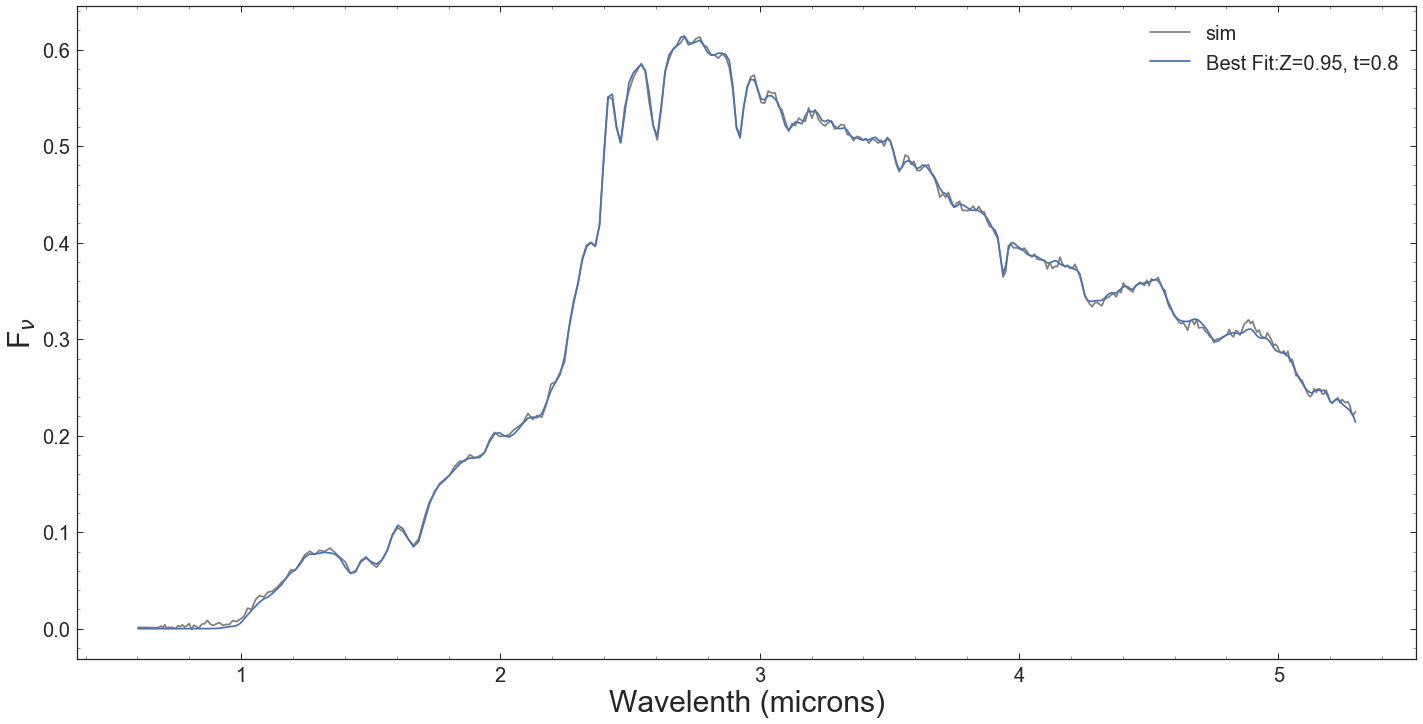

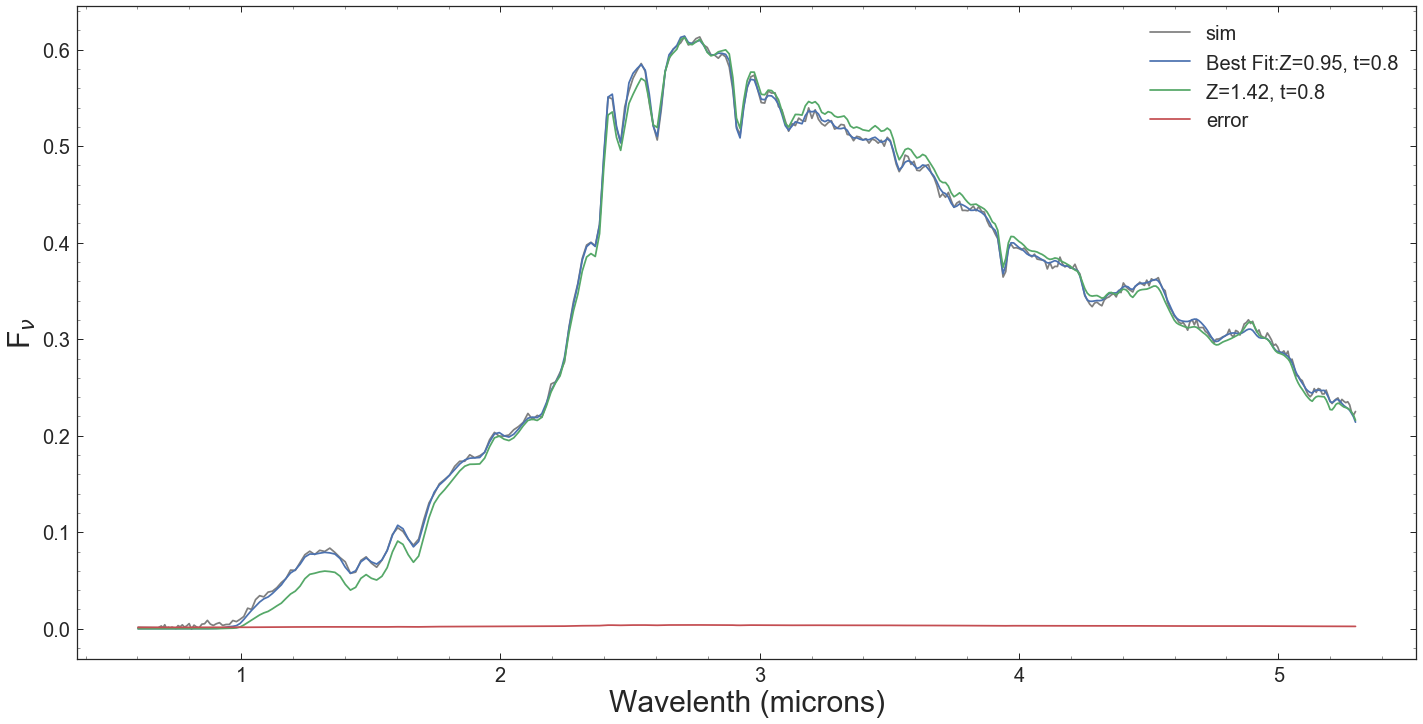

In [ ]:
%matplotlib inline
###DATA
filts = 'prism_z5'
P = np.load('../chidat/%s_tZ_pos.npy' % filts)
Z,PZ = np.load('../chidat/%s_Z_pos.npy' % filts)
t,Pt = np.load('../chidat/%s_t_pos.npy' % filts)
bfmetal = metal[np.argmax(PZ)]
bfage = age[np.argmax(Pt)]
onesig,twosig = Likelihood_contours(age,metal,P)
levels = np.array([twosig,onesig])

wv,fl,flx,er = np.load('../data/nirspec_sim_data_%s.npy' % filts)
bfm,bfa,bft = Highest_likelihood_model_JWST('../data/nirspec_sim_data_%s.npy' % filts, filts, bfmetal, bfage, tau)
mwv,mfl = np.load('../JWST/m%s_a%s_t%s_%s.npy' % (bfm,bfa,bft,filts))
mfl *= (mwv) ** 2 / 3E14
C = Scale_model(flx, er, mfl)

P150 = P.T[23] / np.trapz(P.T[23],age)
# P50 = P.T[6] / np.trapz(P.T[6],age)
# bfage50,el,eh = Median_w_Error(P50,age)
bfage150,el,eh = Median_w_Error(P150,age)
# bfm50, bfa50, bft50 = Highest_likelihood_model_JWST('../data/nirspec_sim_data_%s.npy' % filts, filts, 0.01, bfage50, tau)
bfm150, bfa150, bft150 = Highest_likelihood_model_JWST('../data/nirspec_sim_data_%s.npy' % filts, filts, 0.027, bfage150, tau)

# mwv50,mfl50 = np.load('../JWST/m0.01_a%s_t%s_%s.npy' % (bfa,bft,filts))
# mfl50 *= (mwv50) ** 2 / 3E14
# C50 = Scale_model(flx, er, mfl50)

mwv150,mfl150 = np.load('../JWST/m0.027_a%s_t%s_%s.npy' % (bfa,bft,filts))
mfl150 *= (mwv150) ** 2 / 3E14
C150 = Scale_model(flx, er, mfl150)

def smoothing(fl,h):
    kernal=-np.linspace(-1,1,h+3)**2+1

    sm = np.zeros(len(fl))
    for i in range(len(fl)):
        w = np.zeros(len(fl))
        for ii in range(len(kernal)):
            if ii + i - h + 1 >= 0 and ii + i - h + 1 < len(fl):
                w[ii + i - h + 1] = kernal[ii] 
        sm[i] = sum(fl[w != 0] * w[w != 0]) / sum(w[w != 0])
    return sm

smfl = smoothing(flx[fl>0.001],10)

###PLOT
gs = gridspec.GridSpec(2,2,height_ratios=[1,4],width_ratios=[4,1],hspace=0,wspace=0)
plt.figure(figsize=[8,8])
plt.subplot(gs[2])
plt.contour(M,A,P,levels,colors='k',linewidths=2)
plt.contourf(M,A,P,40,cmap=cmap)
plt.axis([0,0.03,0,2])
plt.xlabel('Metallicity (Z$_\odot$)',size=35)
plt.ylabel('Average Age (Gyrs)',size=35)
plt.tick_params(axis='both', which='major', labelsize=25)
plt.xticks([0.00475, 0.0095, 0.01425, 0.019, 0.02375, 0.0285], [0.25, .5, 0.75, 1.0, 1.25, 1.5])
plt.gcf().subplots_adjust(left=0.16)
plt.subplot(gs[0])
plt.plot(Z,PZ)
plt.xticks([])
plt.yticks([])
plt.xlim(0,0.03)
plt.ylim(0,max(PZ))
plt.subplot(gs[3])
plt.plot(Pt,t)
plt.xticks([])
plt.yticks([])
plt.ylim(0,2)
plt.xlim(0,max(Pt))
plt.show()
# plt.savefig('../plots/nirspec_Lh_%s.png' % filts)
plt.close()

plt.figure(figsize=[24,12])
plt.plot(wv[fl>0.001],flx[fl>0.001],color='k',alpha = .5,label = 'sim')
# plt.plot(mwv,mfl*C,label='Best Fit:Z=%s, t=%s' % (np.round(bfm/0.019,2),bfa))
plt.plot(mwv[fl>0.001],mfl[fl>0.001]*C,label='Best Fit:Z=%s, t=%s' % (np.round(bfm/0.019,2),bfa))
plt.xlabel('Wavelenth (microns)',fontsize=30)
plt.legend(fontsize=20)
plt.ylabel('F$_\\nu$',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()
# plt.savefig('../plots/nirspec_sim_%s.png' % filts)
plt.close()

plt.figure(figsize=[24,12])
# plt.plot(wv[fl>0.001],smfl,'k',label = 'smoothed sim')
plt.plot(wv[fl>0.001],flx[fl>0.001],color='k',alpha = .5,label = 'sim')
plt.plot(mwv[fl>0.001],mfl[fl>0.001]*C,label='Best Fit:Z=%s, t=%s' % (np.round(bfm/0.019,2),bfa))
# plt.plot(mwv[fl>0.001],mfl50[fl>0.001]*C50,label='Z=%s, t=%s' % (np.round(0.01/0.019,2),bfa50))
plt.plot(mwv[fl>0.001],mfl150[fl>0.001]*C150,label='Z=%s, t=%s' % (np.round(0.027/0.019,2),bfa150))
plt.plot(wv[fl>0.001],er[fl>0.001],label = 'error')
plt.xlabel('Wavelenth (microns)',fontsize=30)
plt.legend(fontsize=20)
plt.ylabel('F$_\\nu$',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()
# plt.savefig('../plots/nirspec_smth_%s.png' % filts)
plt.close()

# dtable = Table([wv[fl>0.001],fl[fl>0.001],flx[fl>0.001],er[fl>0.001],mfl[fl>0.001]*C],names=['wv','flux','sim_flux', 'error', 'best_fit_flux'])
# ascii.write(dtable,'../data/%s.dat' % filts)

#features to fit

In [ ]:
wv,fl,flx,er = np.load('../data/nirspec_sim_data_prism_z2.npy')

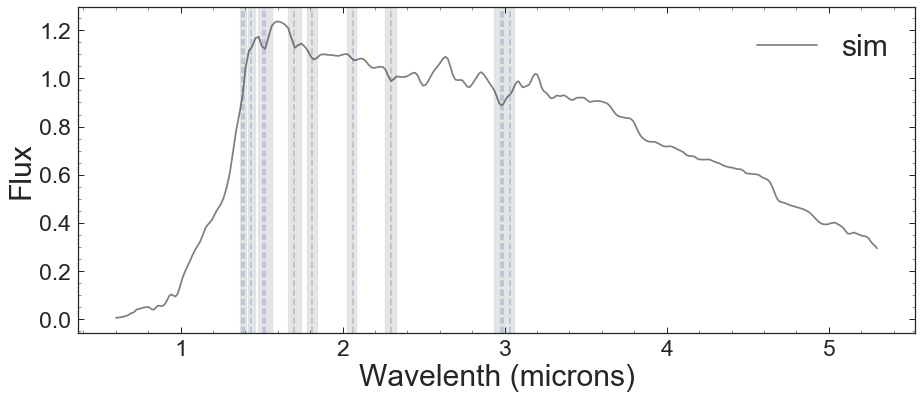

In [ ]:
%matplotlib inline

z=2.5

plt.figure(figsize=[15,6])
plt.plot(wv[fl>0.001],fl[fl>0.001],color='k',alpha = .5,label = 'sim')
# plt.plot(wv[IDF],fl[IDF],color='k',alpha = .5,label = 'sim')
# plt.plot(wv[fl>0.001],fl[fl>0.001],'ko',alpha = .5,label = 'sim')
plt.xlabel('Wavelenth (microns)',fontsize=30)
plt.legend(fontsize=30)
plt.ylabel('Flux',fontsize=30)
plt.axvline(3934.777*(1+z)*1E-4,linestyle='--', alpha=.3) # Ca H
plt.axvline(3969.588*(1+z)*1E-4,linestyle='--', alpha=.3) # Ca K
plt.axvline(4102.89*(1+z)*1E-4,linestyle='--', alpha=.3) # Hd
plt.axvline(4305.61*(1+z)*1E-4,linestyle='--', alpha=.3) # G
plt.axvline(4341.68*(1+z)*1E-4,linestyle='--', alpha=.3) # Hg
plt.axvline(4862.68*(1+z)*1E-4,linestyle='--', alpha=.3) # Hb
plt.axvline(5176.7*(1+z)*1E-4,linestyle='--', alpha=.3) # Mgb
plt.axvline(5895.6*(1+z)*1E-4,linestyle='--', alpha=.3) # Na
plt.axvline(6564.61*(1+z)*1E-4,linestyle='--', alpha=.3) # Ha
plt.axvline(8500*(1+z)*1E-4,linestyle='--', alpha=.3) # CaII
plt.axvline(8544*(1+z)*1E-4,linestyle='--', alpha=.3) # CaII
plt.axvline(8664*(1+z)*1E-4,linestyle='--', alpha=.3) # CaII
plt.axvspan(3910*(1+z)*1E-4, 4030*(1+z)*1E-4, color='k', alpha=.1) # Ca HK + 4000 ang break
plt.axvspan(4050*(1+z)*1E-4, 4180*(1+z)*1E-4, color='k', alpha=.1) # Hd
plt.axvspan(4220*(1+z)*1E-4, 4480*(1+z)*1E-4, color='k', alpha=.1) # G + Hg
plt.axvspan(4750*(1+z)*1E-4, 5000*(1+z)*1E-4, color='k', alpha=.1) # Hb
plt.axvspan(5090*(1+z)*1E-4, 5280*(1+z)*1E-4, color='k', alpha=.1) # Mgb
plt.axvspan(5800*(1+z)*1E-4, 5970*(1+z)*1E-4, color='k', alpha=.1) # Na
plt.axvspan(6460*(1+z)*1E-4, 6670*(1+z)*1E-4, color='k', alpha=.1) # Ha
plt.axvspan(8380*(1+z)*1E-4, 8750*(1+z)*1E-4, color='k', alpha=.1) # CaII
plt.tick_params(axis='both', which='major', labelsize=23)
# plt.xlim(2.9,3.1)
# plt.ylim(0.88,1.)
# plt.savefig('../plots/nirspec_sim_spec.png')

IDF = []
for i in range(len(wv)):
    if 0.3910 <= wv[i]/(1+z) <= 0.4030 or 0.4050 <= wv[i]/(1+z) <= 0.4180 or 0.4220 <= wv[i]/(1+z) <= 0.4480 \
            or 0.4750 <= wv[i]/(1+z) <= 0.5000 or 0.5090 <= wv[i]/(1+z) <= 0.5280 or 0.5800 <= wv[i]/(1+z)\
            <= 0.5970 or 0.6460 <= wv[i]/(1+z) <= 0.6670 or 0.8380 <= wv[i]/(1+z) <= 0.8750:
        IDF.append(i)

In [ ]:
wv,fl,flx,er = np.load('../data/nirspec_sim_data_g395m_f290lp_z5.npy')

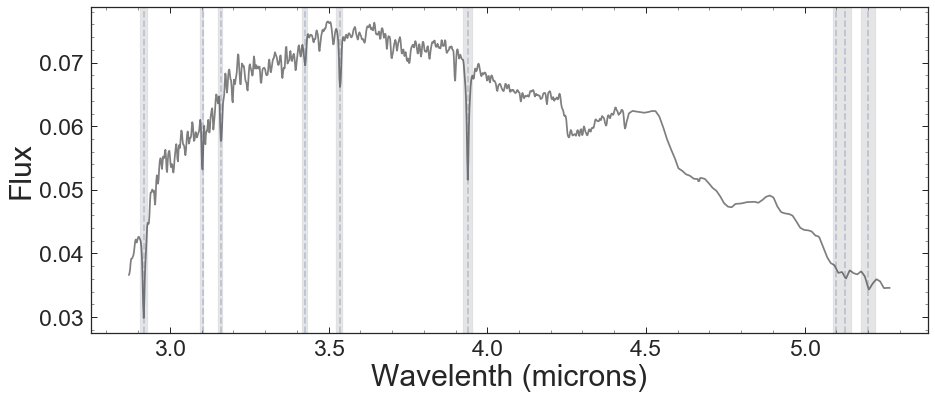

In [64]:
%matplotlib inline

z=5

plt.figure(figsize=[15,6])
plt.plot(wv[fl>0.001],fl[fl>0.001],color='k',alpha = .5)
# plt.plot(wv[IDF],fl[IDF],color='k',alpha = .5,label = 'sim')
# plt.plot(wv[fl>0.001],fl[fl>0.001],'ko',alpha = .5,label = 'sim')
plt.xlabel('Wavelenth (microns)',fontsize=30)
plt.legend(fontsize=30)
plt.ylabel('Flux',fontsize=30)
plt.axvline(4862.68*(1+z)*1E-4,linestyle='--', alpha=.3) # Hb
plt.axvline(5175*(1+z)*1E-4,linestyle='--', alpha=.3) # MgI
plt.axvline(5269*(1+z)*1E-4,linestyle='--', alpha=.3) # MgH
plt.axvline(5710.7*(1+z)*1E-4,linestyle='--', alpha=.3) # Mg I
plt.axvline(5895.6*(1+z)*1E-4,linestyle='--', alpha=.3) # Na
plt.axvline(6564.61*(1+z)*1E-4,linestyle='--', alpha=.3) # Ha
plt.axvline(8500*(1+z)*1E-4,linestyle='--', alpha=.3) # CaII
plt.axvline(8544*(1+z)*1E-4,linestyle='--', alpha=.3) # CaII
plt.axvline(8664*(1+z)*1E-4,linestyle='--', alpha=.3) # CaII
plt.axvspan(4845*(1+z)*1E-4, 4885*(1+z)*1E-4, color='k', alpha=.1) # Hb
plt.axvspan(5160*(1+z)*1E-4, 5180*(1+z)*1E-4, color='k', alpha=.1) # Mg
plt.axvspan(5255*(1+z)*1E-4, 5280*(1+z)*1E-4, color='k', alpha=.1) # Mg
plt.axvspan(5695*(1+z)*1E-4, 5725*(1+z)*1E-4, color='k', alpha=.1) # Mg
plt.axvspan(5875*(1+z)*1E-4, 5910*(1+z)*1E-4, color='k', alpha=.1) # Na
plt.axvspan(6540*(1+z)*1E-4, 6590*(1+z)*1E-4, color='k', alpha=.1) # Ha
plt.axvspan(8480*(1+z)*1E-4, 8580*(1+z)*1E-4, color='k', alpha=.1) # CaII
plt.axvspan(8630*(1+z)*1E-4, 8710*(1+z)*1E-4, color='k', alpha=.1) # CaII
plt.tick_params(axis='both', which='major', labelsize=23)
# plt.xlim(3.4,3.5)
# plt.ylim(0.065,.08)
plt.savefig('../plots/nirspec_sim_spec_g395_ff.png')

IDF = []
for i in range(len(wv)):
    if 0.4845 <= wv[i]/(1+z) <= 0.4885 or 0.5160 <= wv[i]/(1+z) <= 0.5180 or 0.5255 <= wv[i]/(1+z) <= 0.5280 \
            or 0.5695 <= wv[i]/(1+z) <= 0.5725 or 0.5875 <= wv[i]/(1+z) <= 0.5910 or 0.6540 <= wv[i]/(1+z)\
            <= 0.6590 or 0.8480 <= wv[i]/(1+z) <= 0.8580 or 0.8630 <= wv[i]/(1+z) <= 0.8710:
        IDF.append(i)

In [ ]:
IDhb = []
IDmg1 = []
IDmg2 = []
IDmg3 = []
IDna = []
IDha = []
IDca1 = []
IDca2 = []
for i in range(len(wv)):
    if 0.4845 <= wv[i]/(1+z) <= 0.4885:
        IDhb.append(i)
    if 0.5160 <= wv[i]/(1+z) <= 0.5180:
        IDmg1.append(i)
    if 0.5255 <= wv[i]/(1+z) <= 0.5280:
        IDmg2.append(i)
    if 0.5695 <= wv[i]/(1+z) <= 0.5725: 
        IDmg3.append(i)
    if 0.5875 <= wv[i]/(1+z) <= 0.5910:
        IDna.append(i)
    if 0.6540 <= wv[i]/(1+z) <= 0.6590:
        IDha.append(i)
    if 0.8480 <= wv[i]/(1+z) <= 0.8580:
        IDca1.append(i)
    if 0.8630 <= wv[i]/(1+z) <= 0.8710:
        IDca2.append(i)

In [59]:
%matplotlib inline
###DATA
filts = 'g395m_f290lp_z5'
P = np.load('../chidat/%s_ff_tZ_pos.npy' % filts)
Z,PZ = np.load('../chidat/%s_ff_Z_pos.npy' % filts)
t,Pt = np.load('../chidat/%s_ff_t_pos.npy' % filts)
bfmetal = metal[np.argmax(PZ)]
bfage = age[np.argmax(Pt)]
onesig,twosig = Likelihood_contours(age,metal,P)
levels = np.array([twosig,onesig])

wv,fl,flx,er = np.load('../data/nirspec_sim_data_%s_ff.npy' % filts)
bfm,bfa,bft = Highest_likelihood_model_JWST('../data/nirspec_sim_data_%s_ff.npy' % filts, filts, bfmetal, bfage, tau)
mwv,mfl = np.load('../JWST/m%s_a%s_t%s_%s.npy' % (bfm,bfa,bft,filts))
mfl *= (mwv) ** 2 / 3E14
C = Scale_model(flx, er, mfl)

P150 = P.T[23] / np.trapz(P.T[23],age)
P50 = P.T[6] / np.trapz(P.T[6],age)
bfage50,el,eh = Median_w_Error(P50,age)
bfage150,el,eh = Median_w_Error(P150,age)
bfm50, bfa50, bft50 = Highest_likelihood_model_JWST('../data/nirspec_sim_data_%s.npy' % filts, filts, 0.01, bfage50, tau)
bfm150, bfa150, bft150 = Highest_likelihood_model_JWST('../data/nirspec_sim_data_%s.npy' % filts, filts, 0.027, bfage150, tau)

mwv50,mfl50 = np.load('../JWST/m0.01_a%s_t%s_%s.npy' % (bfa,bft,filts))
mfl50 *= (mwv50) ** 2 / 3E14
C50 = Scale_model(flx, er, mfl50)

mwv150,mfl150 = np.load('../JWST/m0.027_a%s_t%s_%s.npy' % (bfa,bft,filts))
mfl150 *= (mwv150) ** 2 / 3E14
C150 = Scale_model(flx, er, mfl150)

def smoothing(fl,h):
    kernal=-np.linspace(-1,1,h+3)**2+1

    sm = np.zeros(len(fl))
    for i in range(len(fl)):
        w = np.zeros(len(fl))
        for ii in range(len(kernal)):
            if ii + i - h + 1 >= 0 and ii + i - h + 1 < len(fl):
                w[ii + i - h + 1] = kernal[ii] 
        sm[i] = sum(fl[w != 0] * w[w != 0]) / sum(w[w != 0])
    return sm

smfl = smoothing(flx[fl>0.001],10)

###PLOT
gs = gridspec.GridSpec(2,2,height_ratios=[1,4],width_ratios=[4,1],hspace=0,wspace=0)
plt.figure(figsize=[8,8])
plt.subplot(gs[2])
plt.contour(M,A,P,levels,colors='k',linewidths=2)
plt.contourf(M,A,P,40,cmap=cmap)
plt.axis([0,0.03,0,2])
plt.xlabel('Metallicity (Z$_\odot$)',size=35)
plt.ylabel('Average Age (Gyrs)',size=35)
plt.tick_params(axis='both', which='major', labelsize=25)
plt.xticks([0.00475, 0.0095, 0.01425, 0.019, 0.02375, 0.0285], [0.25, .5, 0.75, 1.0, 1.25, 1.5])
plt.gcf().subplots_adjust(left=0.16)
plt.subplot(gs[0])
plt.plot(Z,PZ)
plt.xticks([])
plt.yticks([])
plt.xlim(0,0.03)
plt.ylim(0,max(PZ))
plt.subplot(gs[3])
plt.plot(Pt,t)
plt.xticks([])
plt.yticks([])
plt.ylim(0,2)
plt.xlim(0,max(Pt))
# plt.show()
plt.savefig('../plots/nirspec_Lh_%s_ff.png' % filts)
plt.close()

plt.figure(figsize=[24,12])
plt.plot(wv[fl>0.001],flx[fl>0.001],color='k',alpha = .5,label = 'sim')
# plt.plot(mwv,mfl*C,label='Best Fit:Z=%s, t=%s' % (np.round(bfm/0.019,2),bfa))
plt.plot(mwv[fl>0.001],mfl[fl>0.001]*C,label='Best Fit:Z=%s, t=%s' % (np.round(bfm/0.019,2),bfa))
plt.xlabel('Wavelenth (microns)',fontsize=30)
plt.legend(fontsize=20)
plt.ylabel('F$_\\nu$',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
# plt.show()
plt.savefig('../plots/nirspec_sim_%s_ff.png' % filts)
plt.close()

plt.figure(figsize=[24,12])
plt.plot(wv[fl>0.001],smfl,'k',label = 'smoothed sim')
# plt.plot(wv[fl>0.001],flx[fl>0.001],color='k',alpha = .5,label = 'sim')
plt.plot(mwv[fl>0.001],mfl[fl>0.001]*C,label='Best Fit:Z=%s, t=%s' % (np.round(bfm/0.019,2),bfa))
plt.plot(mwv[fl>0.001],mfl50[fl>0.001]*C50,label='Z=%s, t=%s' % (np.round(0.01/0.019,2),bfa50))
plt.plot(mwv[fl>0.001],mfl150[fl>0.001]*C150,label='Z=%s, t=%s' % (np.round(0.027/0.019,2),bfa150))
plt.plot(wv[fl>0.001],er[fl>0.001],label = 'error')
plt.xlabel('Wavelenth (microns)',fontsize=30)
plt.legend(fontsize=20)
plt.ylabel('F$_\\nu$',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
# plt.show()
plt.savefig('../plots/nirspec_smth_%s_ff.png' % filts)
plt.close()

# dtable = Table([wv[fl>0.001],fl[fl>0.001],flx[fl>0.001],er[fl>0.001],mfl[fl>0.001]*C],names=['wv','flux','sim_flux', 'error', 'best_fit_flux'])
# ascii.write(dtable,'../data/%s_ff.dat' % filts)